In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

0
110
[  0   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18  19  20
  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38
  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56
  57  58  59  60  61  62  63  64  65 106 107 109 110]
(376, 1241, 3)


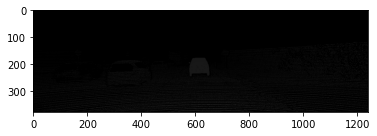

In [4]:
img = cv2.imread('/userfiles/tanjary21/lea_data/kitti2015/training/disp_occ_0/000199_10.png')
#cv2.imshow('',img)
plt.imshow(img)
# img = np.array(img)
# print(img)
print(np.amin(img)) # 0
print(np.amax(img)) # 110
print(np.unique(img))
print(img.shape)

4
33
[ 4  5  7  8 11 13 17 19 20 21 22 23 24 25 26 29 33]
(375, 1242, 3)


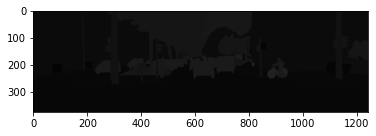

In [6]:
img = cv2.imread('/userfiles/tanjary21/lea_data/kitti2015/training/semantic/000150_10.png')
#cv2.imshow('',img)
plt.imshow(img)
# img = np.array(img)
# print(img)
print(np.amin(img)) # 4
print(np.amax(img)) # 28
print(np.unique(img))
print(img.shape)

In [65]:
# V1 Architecture results0.txt
# V2 Architecture results1.txt

from io import StringIO
import subprocess
import pandas as pd
import numpy as np
np.set_printoptions(suppress=True)

output = subprocess.check_output("more ./console/results1.txt | grep '===> Test: Avg. Error:'", shell=True)
output = str(output,'utf-8')
output = StringIO(output)
df=pd.read_csv(output,header=None, delimiter=r"\s+")

arr = np.array(df.iloc[:,[4,5]])

for i,score in enumerate(arr):
    arr[i,0] = float(score[0][1:])
    arr[i,1] = float(score[1][:-1])

arr = arr.astype(np.float32)

print('min error:', np.min(arr[:,0]), 'at epoch',np.argmin(arr[:,0]),'loss',arr[np.argmin(arr[:,0]),1])
print('min loss:', np.min(arr[:,1]),'at epoch' ,np.argmin(arr[:,1]),'error',arr[np.argmin(arr[:,1]),0])
    

min error: 1.7022 at epoch 58 loss 0.1966
min loss: 0.1952 at epoch 52 error 1.7364


In [61]:
# V3 Architecture results2.txt
from io import StringIO
import subprocess
import pandas as pd
import numpy as np
np.set_printoptions(suppress=True)

output = subprocess.check_output("more ./console/results2.txt | grep 'Avg. Loss:'", shell=True)
output = str(output,'utf-8')
output = StringIO(output)
df=pd.read_csv(output,header=None, delimiter=r"\s+")

arr = np.array(df.iloc[:,6])

for i,score in enumerate(arr):
    arr[i] = float(score[1:-2])

arr = arr.astype(np.float32)

print('min loss:', np.min(arr),'at epoch' ,np.argmin(arr))
    

min loss: 2.6647 at epoch 237


In [76]:
# V4 Architecture results3.txt

from io import StringIO
import subprocess
import pandas as pd
import numpy as np
np.set_printoptions(suppress=True)

output = subprocess.check_output("more ./console/results45.txt | grep '20): Error, Loss:'", shell=True)
output = str(output,'utf-8')
output = StringIO(output)
df=pd.read_csv(output,header=None, delimiter=r"\s+")

arr = np.array(df.iloc[:,[4,5]])

for i,score in enumerate(arr):
    arr[i,0] = float(score[0][1:])
    arr[i,1] = float(score[1][:-1])

arr = arr.astype(np.float32)

arr2 = np.zeros((446,2))
for a,i in enumerate(range(0,len(arr),20)):
    for j in range(20):
        arr2[a,0] += arr[i+j,0]/20
        arr2[a,1] += arr[i+j,1]/20

print('min error:', np.min(arr2[:,0]), 'at epoch',np.argmin(arr2[:,0]),'loss',arr2[np.argmin(arr2[:,0]),1])
print('min loss:', np.min(arr2[:,1]),'at epoch' ,np.argmin(arr2[:,1]),'error',arr2[np.argmin(arr2[:,1]),0])

min error: 0.7027849942445756 at epoch 341 loss 0.91337501257658
min loss: 0.7788349978625775 at epoch 105 error 0.7106000036001205


In [73]:
arr2

array([[0.59174   , 2.97299002],
       [0.508225  , 2.210555  ],
       [0.47157   , 1.93141999],
       ...,
       [0.200575  , 1.764765  ],
       [0.203335  , 1.77367999],
       [0.204305  , 1.74279   ]])

In [ ]:
#v1 architecture, results0.txt
#v2 architecture, results1.txt
#v3 architecture, results2.txt
#v4 architecture, results3.txt/results35.txt, trials
#v4.5 architecture, results45.txt, trials2